In [1]:
import arviz as az
import bambi as bmb
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr

from scipy import special

In [2]:
az.style.use("arviz-white")

In [3]:
length = [
    1.3, 1.32, 1.32, 1.4, 1.42, 1.42, 1.47, 1.47, 1.5, 1.52, 1.63, 1.65, 1.65, 1.65, 1.65,
    1.68, 1.7, 1.73, 1.78, 1.78, 1.8, 1.85, 1.93, 1.93, 1.98, 2.03, 2.03, 2.31, 2.36, 2.46,
    3.25, 3.28, 3.33, 3.56, 3.58, 3.66, 3.68, 3.71, 3.89, 1.24, 1.3, 1.45, 1.45, 1.55, 1.6, 
    1.6, 1.65, 1.78, 1.78, 1.8, 1.88, 2.16, 2.26, 2.31, 2.36, 2.39, 2.41, 2.44, 2.56, 2.67, 
    2.72, 2.79, 2.84
]
choice = [
    "I", "F", "F", "F", "I", "F", "I", "F", "I", "I", "I", "O", "O", "I", "F", "F", 
    "I", "O", "F", "O", "F", "F", "I", "F", "I", "F", "F", "F", "F", "F", "O", "O", 
    "F", "F", "F", "F", "O", "F", "F", "I", "I", "I", "O", "I", "I", "I", "F", "I", 
    "O", "I", "I", "F", "F", "F", "F", "F", "F", "F", "O", "F", "I", "F", "F"
]

sex = ["Male"] * 32 + ["Female"] * 31

data = pd.DataFrame({"choice": choice, "length": length, "sex": sex})

data["choice"]  = pd.Categorical(
    data["choice"].map({"I": "Invertebrates", "F": "Fish", "O": "Other"}), 
    ["Other", "Invertebrates", "Fish"], 
    ordered=True
)
data.head(3)

,choice,length,sex
0,Invertebrates,1.30,Male
1,Fish,1.32,Male
2,Fish,1.32,Male


In [4]:
model = bmb.Model("choice ~ length + sex", data, family="categorical")
idata = model.fit()

/home/tomas/anaconda3/envs/bambi/lib/python3.10/site-packages/aesara/tensor/nnet/basic.py:1116: FutureWarning: Softmax now accepts an axis argument. For backwards-compatibility it defaults to -1 when not specified, but in the future the default will be `None`.
To suppress this warning specify axis explicitly.
  warnings.warn(
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [Intercept, length, sex]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 5 seconds.


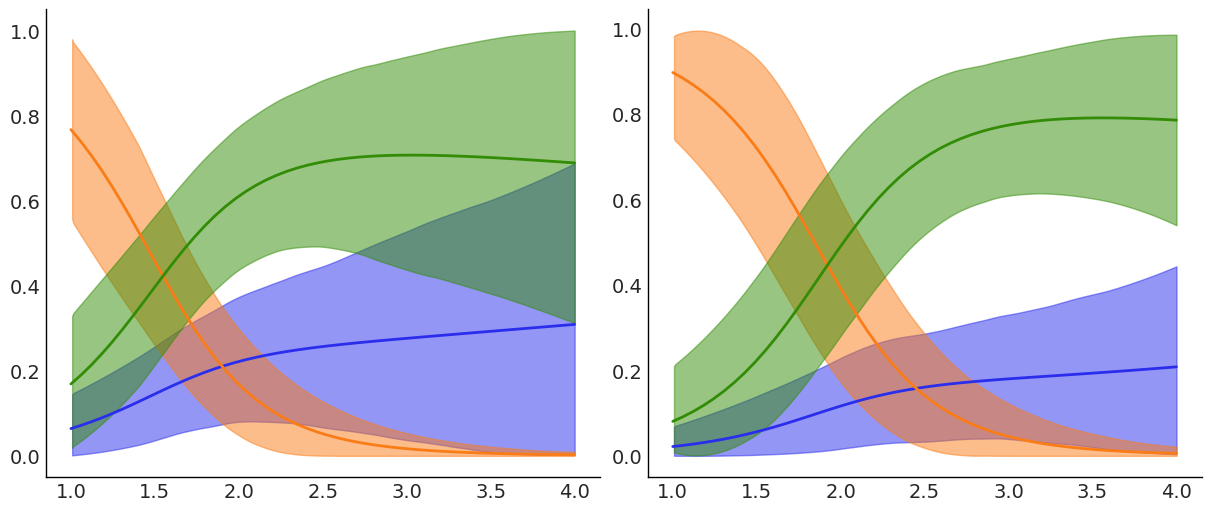

In [5]:
new_length = np.linspace(1, 4)
new_data = pd.DataFrame({"length": np.tile(new_length, 2), "sex": ["Male"] * 50 + ["Female"] * 50})
idata = model.predict(idata, data=new_data, inplace=False)
p = idata.posterior["choice_mean"]

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
choices = ["Other", "Invertebrates", "Fish"]

for j, choice in enumerate(choices):
   males = p.sel({"choice_mean_dim":choice, "choice_obs":slice(0, 49)})
   females = p.sel({"choice_mean_dim":choice, "choice_obs":slice(50, 100)})
   axes[0].plot(new_length, males.mean(("chain", "draw")), color=f"C{j}", lw=2)
   axes[1].plot(new_length, females.mean(("chain", "draw")), color=f"C{j}", lw=2)
   az.plot_hdi(new_length, males, color=f"C{j}", ax=axes[0])
   az.plot_hdi(new_length, females, color=f"C{j}", ax=axes[1])

In [6]:
p

<xarray.DataArray 'choice_mean' (chain: 2, draw: 1000, choice_obs: 100,
                                 choice_mean_dim: 3)>
array([[[[1.19280020e-01, 7.15387437e-01, 1.65332543e-01],
         [1.29658363e-01, 6.84558110e-01, 1.85783527e-01],
         [1.40271833e-01, 6.51953226e-01, 2.07774941e-01],
         ...,
         [5.07994864e-02, 5.93540274e-03, 9.43265111e-01],
         [4.92660354e-02, 5.06727724e-03, 9.45666687e-01],
         [4.77703048e-02, 4.32534988e-03, 9.47904345e-01]],

        [[6.16294959e-02, 8.27002508e-01, 1.11367996e-01],
         [7.12715354e-02, 8.02484977e-01, 1.26243487e-01],
         [8.20755412e-02, 7.75420247e-01, 1.42504212e-01],
         ...,
         [1.89474055e-01, 5.70356060e-03, 8.04822384e-01],
         [1.92719788e-01, 4.86771568e-03, 8.02412497e-01],
         [1.95984803e-01, 4.15359241e-03, 7.99861605e-01]],

        [[6.21177614e-02, 7.81540470e-01, 1.56341769e-01],
         [6.94765100e-02, 7.49147786e-01, 1.81375704e-01],
         [7.72264404e-02, 7.13656710e-01, 2.09116850e-01],
         ...,
...
         ...,
         [3.44156628e-02, 3.12266859e-04, 9.65272070e-01],
         [3.39597473e-02, 2.44293836e-04, 9.65795959e-01],
         [3.35091637e-02, 1.91112878e-04, 9.66299723e-01]],

        [[2.43569002e-02, 7.93156473e-01, 1.82486627e-01],
         [2.76833242e-02, 7.65082306e-01, 2.07234369e-01],
         [3.13136037e-02, 7.34473334e-01, 2.34213063e-01],
         ...,
         [3.43084193e-01, 3.53784616e-03, 6.53377961e-01],
         [3.43456811e-01, 3.00582320e-03, 6.53537366e-01],
         [3.43802175e-01, 2.55360065e-03, 6.53644225e-01]],

        [[2.43569002e-02, 7.93156473e-01, 1.82486627e-01],
         [2.76833242e-02, 7.65082306e-01, 2.07234369e-01],
         [3.13136037e-02, 7.34473334e-01, 2.34213063e-01],
         ...,
         [3.43084193e-01, 3.53784616e-03, 6.53377961e-01],
         [3.43456811e-01, 3.00582320e-03, 6.53537366e-01],
         [3.43802175e-01, 2.55360065e-03, 6.53644225e-01]]]])
Coordinates:
  * chain            (chain) int64 0 1
  * draw             (draw) int64 0 1 2 3 4 5 6 ... 993 994 995 996 997 998 999
  * choice_mean_dim  (choice_mean_dim) <U13 'Other' 'Invertebrates' 'Fish'
  * choice_obs       (choice_obs) int64 0 1 2 3 4 5 6 7 ... 93 94 95 96 97 98 99

In [7]:
model.predict_2(idata, data=new_data, inplace=False)

<xarray.DataArray (choice_obs: 100, chain: 2, draw: 1000, choice_dim: 2)>
array([[[[ 1.79135043,  0.32648502],
         [ 2.59666714,  0.59169941],
         [ 2.53223497,  0.92301248],
         ...,
         [ 3.29418893,  2.06639233],
         [ 3.81039467,  1.31535896],
         [ 3.49772983,  1.33735697]],

        [[ 1.71558253,  0.67743587],
         [ 1.58118329,  0.24656695],
         [ 2.99138989,  0.13298367],
         ...,
         [ 2.14550364,  0.12651372],
         [ 3.48320533,  2.01386171],
         [ 3.48320533,  2.01386171]]],


       [[[ 1.66387052,  0.35967915],
         [ 2.42121611,  0.57171546],
         [ 2.37794756,  0.95958189],
...
         [-4.93455945,  3.34777667],
         [-4.7385099 ,  0.64333834],
         [-4.7385099 ,  0.64333834]]],


       [[[-2.40191117,  2.98784939],
         [-3.85406352,  1.4064016 ],
         [-5.01978668,  2.46106779],
         ...,
         [-6.19386722,  0.69826795],
         [-5.42019159,  1.58720484],
         [-9.01790226,  0.32239555]],

        [[-4.19752433,  1.23666584],
         [-5.16636199,  2.57418636],
         [-6.36452833,  1.68291653],
         ...,
         [-5.16670999,  3.36165511],
         [-4.90256203,  0.64249679],
         [-4.90256203,  0.64249679]]]])
Coordinates:
  * chain       (chain) int64 0 1
  * draw        (draw) int64 0 1 2 3 4 5 6 7 ... 992 993 994 995 996 997 998 999
  * choice_dim  (choice_dim) <U13 'Invertebrates' 'Fish'
Dimensions without coordinates: choice_obs

In [ ]:
idata.posterior

In [ ]:
new_length = np.linspace(1, 4)
new_data = pd.DataFrame({"length": np.tile(new_length, 2), "sex": ["Male"] * 50 + ["Female"] * 50})

In [ ]:
# This is general
X_terms = ["Intercept"] + list(model.common_terms)
Z_terms = []

obs_n = len(new_data)
response_dim = model.response.name + "_obs"
response_levels_dim = model.response.name + "_dim"
response_levels_dim_complete = model.response.name + "_mean_dim"

b = idata.posterior[X_terms].to_stacked_array("__variables__", ("chain", "draw", response_levels_dim))
X = model._design.common.evaluate_new_data(new_data).design_matrix
X = xr.DataArray(X, dims=(response_dim, "__variables__"))

linear_predictor = xr.dot(X, b)

# This is Family specific
# Because of reference encoding, we need to padd with 0s for the last level of the response variable
# (0, 1): 0 new levels on the left, 1 new level on the right
linear_predictor = linear_predictor.pad({response_levels_dim: (0, 1)}, constant_values=0)
mean = xr.apply_ufunc(special.softmax, linear_predictor, kwargs={"axis": -1})

# The mean has the reference level in the dimension, a new name is needed
mean = mean.rename({response_levels_dim: response_levels_dim_complete})

idata.posterior["choice_mean"] = mean.assign_coords(
    {
        response_levels_dim_complete: model.response.levels,
        response_dim: list(range(obs_n))
    }
).transpose(
    "chain", "draw", response_dim, response_levels_dim_complete
)

In [ ]:
idata.posterior["choice_mean"]

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
choices = ["Other", "Invertebrates", "Fish"]

p = idata.posterior["choice_mean"]

for j, choice in enumerate(choices):
   males = p.sel({"choice_mean_dim": choice, "choice_obs":slice(0, 49)})
   females = p.sel({"choice_mean_dim": choice, "choice_obs":slice(50, 100)})
   axes[0].plot(new_length, males.mean(("chain", "draw")), color=f"C{j}", lw=2)
   axes[1].plot(new_length, females.mean(("chain", "draw")), color=f"C{j}", lw=2)
   az.plot_hdi(new_length, males, color=f"C{j}", ax=axes[0])
   az.plot_hdi(new_length, females, color=f"C{j}", ax=axes[1])
fig.subplots_adjust(left=0.05, right=0.975, bottom=0.075, top=0.85)